<h1> Freeform Colorization with stable diffusion v1.5</h1>

In [2]:
# Satvika Eda, Divya Sri Bandaru & Dhriti Anjaria
# 22nd April 2025
# This code is for freeform image colorization with Stable Diffusion v1.5 model.


In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt


In [ ]:
# Load the original image and create gayscale version

original = Image.open("/kaggle/input/test-image1/cat.jpg").convert("RGB")
gray = T.Grayscale(num_output_channels=3)(original) 
gray = gray.resize((512, 512))
device = "cuda" if torch.cuda.is_available() else "cpu"



In [ ]:
# Created a stable diffusion pipeline for v1.5

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

In [ ]:
# Executed the pipe on the grey image

prompt = "restore natural colors without changing actual image"
result = pipe(prompt=prompt, image=gray, strength=0.75, guidance_scale=7.5)

colorized_img = result.images[0]

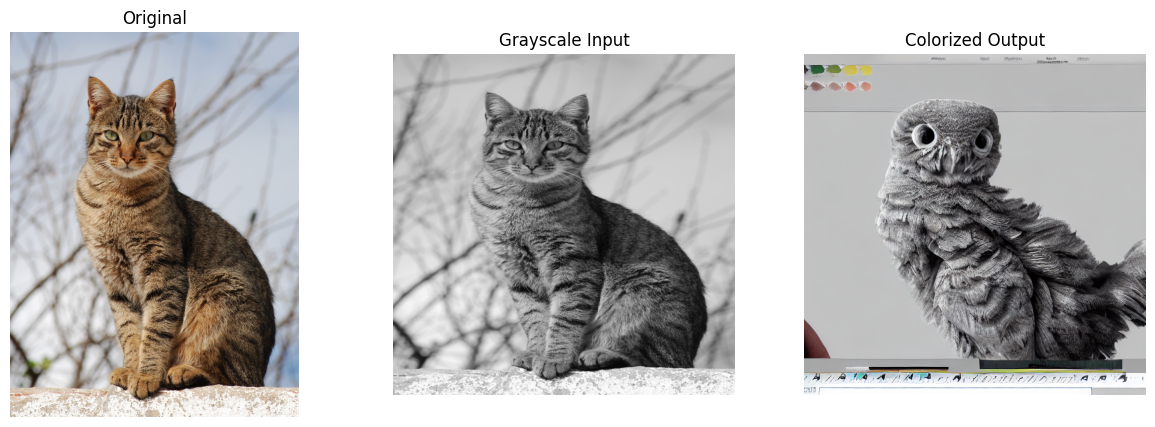

In [ ]:
# Displayed the original, grayscale and colorized image

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(original)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(gray)
axs[1].set_title("Grayscale Input")
axs[1].axis("off")

axs[2].imshow(colorized_img)
axs[2].set_title("Colorized Output")
axs[2].axis("off")

plt.show()
